## Машинное обучение 1, ПМИ ФКН ВШЭ

## Практическое домашнее задание 1

### Общая информация

Дата выдачи: 11.09.2021

Мягкий дедлайн: 23:59MSK 25.09.2021

Жесткий дедлайн: 23:59MSK 28.09.2021

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib. В первом разделе вам предстоит выполнить базовые задания с помощью вышеуказанных библиотек, а во втором распределить студентов по курсам. Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотек pandas и matplotlib.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после жёсткого дедлайна нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно получить у семинариста или ассистента. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-01-pandas-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 10.

## 0. Введение

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написанием production-кода. 

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*. 

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

In [1]:
# ячейка с кодом, при выполнении которой появится output
2 + 2

4

Ячейка с неразмеченыным текстом.

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

In [2]:
print("my code")

my code


[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. Выделять *текст* <s>при</s> **необходимости**
2. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\ 
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

А ещё можно вставлять картинки, или гифки, или что захотите:

<img src="https://media1.tenor.com/images/9b8fbe9214504bcf6c60fe4e4f7e114e/tenor.gif?itemid=5416416" style="width: 400px">

### Google Colab

Что за колаб? 

**Google Colab (Colaboratory)** это **Jupyter Notebook + Cloud + Google Drive.**

Компания Google предоставляет возможность бесплатно запускать ноутбуки (предварительно загрузив их на свой гугл-диск) прямо в облаке. При этом вам не требуется установка никаких пакетов на свою машину, а работать можно прямиком из браузера. Вот ссылка:

https://colab.research.google.com

При использовании вы увидете много сходств с jupyter ноутбуком. Одним из преимуществ является доступность GPU, соответствующую опцию можно активировать в настройках сервиса. При желании вы сможете найти в интернете много туториалов по использованию или разобраться самостоятельно =)

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных.

Основной объект в pandas — это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [3]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Скачаем данные:

Для пользователей Windows: скачайте файл самостоятельно и поместите его в папку с тетрадкой. Или попробуйте один из следующих вариантов:

In [6]:
!pip install wget
import wget 
wget.download('https://dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=1', 'end_seminar.xlsx')

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9687 sha256=045a1aa2d740449457b1b1a409a5684330f9f45d4c61ee9df79213b32ee21030
  Stored in directory: C:\Users\KOTIK\AppData\Local\pip\Cache\wheels\40\15\30\7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
100% [..............................................................................] 50735 / 50735

'end_seminar.xlsx'

##### В первой части задания (до раздела "Распределение студентов по курсам") использование циклов запрещается и повлечет за собой снижение оценки. Использование <code>vectorize</code> и  <code>apply</code>, <code>apply_along_axis</code> крайне нежелательно.

Для каждой задачи из этого раздела вы должны написать код для получения ответа, а также дать текстовый ответ, если он предполагается.

На некоторые вопросы вы можете получить путём пристального взгляда на таблицу, но это не будет засчитываться. Вы в любом случае должны получить ответ с помощью кода.

#### 1. [0 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы? (на это не надо отвечать, просто подумайте об этом)

In [1877]:
df = pd.read_excel('end_seminar.xlsx')

In [1233]:
df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,NaN,NaN,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,NaN,NaN,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,NaN,NaN,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,NaN,NaN,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,NaN,NaN,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,NaN
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,NaN,NaN,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,NaN
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,NaN
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,NaN,NaN,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,NaN


#### 2. [0.5 балла] Ответьте на вопросы:
1. Сколько было заявок из групп 18-го года набора, а сколько из групп 17-го года?
2. Есть ли студенты с равными перцентилями?

In [1234]:
rows = df.shape[0]
nans = df["17_group"].isna().sum()
res_17 = rows - nans

# isna(): nan -> True, остальное -> False. значит, получим сумму nan. а нам наоборот нужно число заполненных. т.е. число всех
# строк минус число nan

In [1235]:
nans = df["18_group"].isna().sum()
res_18 = rows - nans

In [1236]:
print(res_18, "заявок из групп 18-го года набора и", res_17, "заявок из групп 17-го года")

223 заявок из групп 18-го года набора и 138 заявок из групп 17-го года


In [1237]:
df.shape[0] == len(set(df.percentile))

# ЭТО НАДО ЗАПУСКАТЬ ПОСЛЕ ВЫПОЛНЕНИЯ ЗАДАНИЯ-4, ГДЕ Я УДАЛИЛА ВСЕ ДУБЛИКАТЫ

False

Значит, есть студенты с равными перцентилями.

#### 3. [0.5 балла] Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

In [1238]:
res = df.isna().sum()

isna(): nan -> True, заполненное -> False. Значит, в столбиках, где сумма 0, все заполнено. Где не 0 -- там есть пропуски. 

In [1239]:
res[res != 0]

18_group         138
is_mi            343
is_first_time      2
17_group         223
blended          223
is_ml_student    304
dtype: int64

Получается, есть пропуски. Колонки, в которых они есть, перечислены выше. Число пропусков тоже.

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [1240]:
set(df.dtypes)

{dtype('int64'), dtype('float64'), dtype('<M8[ns]'), dtype('O')}

In [1478]:
cat_mask = (df.dtypes == 'object').values
cat = df[df.columns[cat_mask]]
num = df[df.columns[~cat_mask]]

# отделили категориальные от числовых

In [1878]:
cat = cat.fillna('')
num = num.fillna(0)

# заполнили пропуски

In [1879]:
df = pd.concat([cat, num], axis=1)
df.isna().sum() # проверим, что все ок

id               0
fall_1           0
fall_2           0
fall_3           0
spring_1         0
spring_2         0
spring_3         0
is_first_time    0
blended          0
timestamp        0
rating           0
18_group         0
is_mi            0
percentile       0
17_group         0
is_ml_student    0
dtype: int64

#### 4. [0.5 балла] Посмотрите повнимательнее на колонку 'is_first_time'. 

Есть ли в ней ответы "Нет"? Сколько их?

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию. <i>Обращения со значением "Нет" в <code>is_first_time</code> могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.</i>

In [1244]:
print((df["is_first_time"] == 'Нет').sum(), 'ответов "Нет"')

51 ответов "Нет"


In [1245]:
rows == len(set(df.id))

# значит, действительно есть повторные

False

In [1481]:
max_stamps = df.groupby('id').idxmax()['timestamp'].values  

# сгруппировали по id, взяли в каждой группе максимальное время, запомнили индексы строк с такими id и временем

In [1880]:
df = df.loc[max_stamps]

In [1881]:
df

,id,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,blended,timestamp,rating,18_group,is_mi,percentile,17_group,is_ml_student
161,00b40fe7dbfd23e5daba765244509415,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,Анализ данных в бизнесе,Да,,2020-05-18 22:08:11.668,542,187.0,0.0,0.896861,0.0,0.0
76,014b72217e20370dab7acc48b20c47be,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Матричные вычисления,Системы баз данных,Машинное обучение 2,Дискретная оптимизация,Да,,2020-05-18 16:47:43.131,543,186.0,0.0,0.892377,0.0,0.0
335,01b072a0cdb45814fc4ab8ca3e621f0e,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Обучение с подкреплением,Компьютерное зрение,Символьные вычисления,Да,Соревновательный анализ данных,2020-05-18 23:01:39.666,1058,0.0,0.0,0.847826,173.0,0.0
88,044e038535ae5d2ff037150b77fdc6d1,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Да,,2020-05-18 17:56:00.688,710,182.0,0.0,0.139013,0.0,1.0
78,04b88fcbe5ba58aa8369c7de5e574de0,Безопасность компьютерных систем,Моделирование временных рядов,Высокопроизводительные вычисления,Дискретная оптимизация,Компьютерные сети,Промышленное программирование на языке Java,Да,,2020-05-18 17:00:34.890,719,181.0,0.0,0.121076,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,feb53dcdd28fff9dc4a981c3419fea6f,Безопасность компьютерных систем,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,Промышленное программирование на языке Java,Анализ данных в бизнесе,Машинное обучение 2,Нет,,2020-05-18 21:19:50.620,521,186.0,1.0,0.968610,0.0,0.0
281,fecff7bd30995d16b59fb392d47b3760,Анализ неструктурированных данных,Безопасность компьютерных систем,Байесовские методы машинного обучения,Обучение с подкреплением,Компьютерное зрение,Генеративные модели в машинном обучении,Да,DevOps,2020-05-18 14:29:51.415,1278,0.0,0.0,0.094203,171.0,0.0
103,ff549c331d45453052f28ad2614afda9,Моделирование временных рядов,Теория баз данных,Матричные вычисления,Численные методы,Анализ данных в бизнесе,Промышленное программирование на языке Java,Да,,2020-05-18 19:23:23.735,723,182.0,0.0,0.107623,0.0,0.0
307,ffc04c64d068f8d85e4dc44e7f297ecc,Байесовские методы машинного обучения,Statistical Learning Theory,Глубинное обучение в обработке звука,Обучение с подкреплением,Генеративные модели в машинном обучении,Компьютерное зрение,Нет,Соревновательный анализ данных,2020-05-18 21:00:45.274,1163,0.0,0.0,0.471014,171.0,0.0


#### 5. [0.5 балла] Какие  blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из курсов собрались студенты с самым высоким средним рейтингом? 

In [1249]:
blended = set(df[df["17_group"] != 0]['blended'])  # выделила отдельно четверокурсников, у них нашла все blended-курсы
blended

{'DevOps',
 'Введение в дифференциальную геометрию',
 'Соревновательный анализ данных'}

In [1250]:
df.groupby(['blended']).count()["17_group"].loc[blended].idxmax()  # на который больше всего записалось

'DevOps'

In [1251]:
df.groupby(['blended']).mean()["rating"].loc[blended].idxmax()  # с самым высоким средним рейтингом

'Введение в дифференциальную геометрию'

#### 6. [1 балл] Выясните, есть ли в данных студенты с абсолютно одинаковыми предпочтениями по всем курсам (не забудьте учесть blended-курсы для четверокурсников). Сколько таких наборов, которые взяли несколько студентов? Выведите их все вместе с количеством выбравших их студентов.

<i>Предпочтения двух студентов считаются абсолютно одинаковыми, если выбранные ими дисциплины имеют одинаковый приоритет.</i>

In [1252]:
count = df.groupby(['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']).count()
count = count[count.id >= 2]
print("да, такие наборы есть, их", count.shape[0])

да, такие наборы есть, их 15


In [1253]:
pd.DataFrame(count.id)  # вот все наборы с числом выбравших их студентов (число в столбике id)

id
fall_1                                          fall_2                                          fall_3                                          spring_1                                           spring_2                                    spring_3                                    blended    
Statistical Learning Theory                     Анализ неструктурированных данных               Сбор и обработка данных с помощью краудсорсинга Обучение с подкреплением                           Конфликты и кооперация                      Компьютерное зрение                         DevOps    2
Байесовские методы машинного обучения           Анализ неструктурированных данных               Глубинное обучение в обработке звука            Обучение с подкреплением                           Генеративные модели в машинном обучении     Компьютерное зрение                         DevOps    2
                                                                                                Сбор и обработка данных с помощью краудсорсинга Обучение с подкреплением                           Компьютерное зрение                         Генеративные модели в машинном обучении     DevOps    2
Безопасность компьютерных систем                Statistical Learning Theory                     Матричные вычисления                            Дискретная оптимизация                             Промышленное программирование на языке Java Дополнительные главы прикладной статистики            3
                                                Высокопроизводительные вычисления               Анализ неструктурированных данных               Проектирование и разработка высоконагруженных с... Методы сжатия и передачи медиаданных        Конфликты и кооперация                      DevOps    2
                                                                                                Язык SQL                                        Компьютерные сети                                  Промышленное программирование на языке Java Дискретная оптимизация                                3
                                                                                                                                                Промышленное программирование на языке Java        Компьютерные сети                           Системы баз данных                                    2
                                                Матричные вычисления                            Моделирование временных рядов                   Промышленное программирование на языке Java        Компьютерные сети                           Дискретная оптимизация                                2
                                                Сбор и обработка данных с помощью краудсорсинга Матричные вычисления                            Компьютерные сети                                  Промышленное программирование на языке Java Анализ данных в бизнесе                               2
                                                Теория баз данных                               Язык SQL                                        Машинное обучение 2                                Компьютерные сети                           Промышленное программирование на языке Java           2
Высокопроизводительные вычисления               Безопасность компьютерных систем                Сбор и обработка данных с помощью краудсорсинга Проектирование и разработка высоконагруженных с... Методы сжатия и передачи медиаданных        Компьютерное зрение                         DevOps    2
                                                Сбор и обработка данных с помощью краудсорсинга Моделирование временных рядов                   Проектирование и разработка высоконагруженных с... Методы сжатия и передачи медиаданных        Методы сжатия и передачи медиаданных        DevOps    2
Моделирование временных рядов                   Сбор и обработка данных с помощью краудсорсинга Безопасность компьютерных систем                Компьютерные сети 

#### 7. [0.5 балла] Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

In [1254]:
df_18 = df[df["18_group"] != 0].iloc[:, 1:7]
df_17 = df[df["17_group"] != 0].iloc[:, 1:7]
df_1718 = df.iloc[:, 1:7]
all_courses = set(df_1718.values.reshape(1, -1)[0])
courses_18 = set(df_18.values.reshape(1, -1)[0])
courses_17 = set(df_17.values.reshape(1, -1)[0])
courses_both = courses_17 & courses_18
courses_both

{'Statistical Learning Theory',
 'Безопасность компьютерных систем',
 'Высокопроизводительные вычисления',
 'Моделирование временных рядов',
 'Принятие решений в условиях риска и неопределённости',
 'Сбор и обработка данных с помощью краудсорсинга',
 'Численные методы'}

Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [1255]:
all_courses - courses_both

{'Анализ данных в бизнесе',
 'Анализ неструктурированных данных',
 'Байесовские методы машинного обучения',
 'Генеративные модели в машинном обучении',
 'Глубинное обучение в обработке звука',
 'Дискретная оптимизация',
 'Дополнительные главы прикладной статистики',
 'Компьютерное зрение',
 'Компьютерные сети',
 'Конфликты и кооперация',
 'Матричные вычисления',
 'Машинное обучение 2',
 'Методы сжатия и передачи медиаданных',
 'Обучение с подкреплением',
 'Проектирование и разработка высоконагруженных сервисов',
 'Промышленное программирование на языке Java',
 'Символьные вычисления',
 'Системы баз данных',
 'Теория баз данных',
 'Язык SQL'}

### Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. Здесь будут описаны ключевые правила оформления графиков для **всех** домашних заданий.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить один из них. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать;
- если распределение на гистограмме имеет тяжёлые хвосты, лучше использовать логарифмическую шкалу.

Полезные строчки:
- для красивой картинки <code>%config InlineBackend.figure_format = 'retina'</code>
- задаем размер (почти) всех графиков (можно выбрать другие значения) <code>plt.rcParams['figure.figsize'] = 8, 5</code>
- размер шрифта подписей графиков <code>plt.rcParams['font.size'] = 12</code>
- формат в котором сохраняется изображение <code>mpl.rcParams['savefig.format'] = 'pdf'</code>
- sns – seaborn, добавляет решетку <code>sns.set_style('darkgrid')</code>

In [1256]:
%matplotlib inline
import matplotlib.pyplot as plt

#### 8. [0.5 балла] Постройте график средних рейтингов по дням получения ответов (bar plot).

In [1257]:
df["timestamp_days"] = df.timestamp.dt.date  # создала столбец с днями ответов
time_rating = df.groupby(['timestamp_days']).mean()['rating']  # тут как раз нужная информация хранится
time_rating

timestamp_days
2020-05-14    1160.277778
2020-05-15     719.866667
2020-05-16     736.400000
2020-05-17     915.027027
2020-05-18     827.352679
2020-05-19     761.142857
2020-05-20     689.500000
2020-05-21     584.000000
2020-05-23    1080.500000
2020-05-24     670.500000
Name: rating, dtype: float64

In [1258]:
ratings = time_rating.values
time = time_rating.index

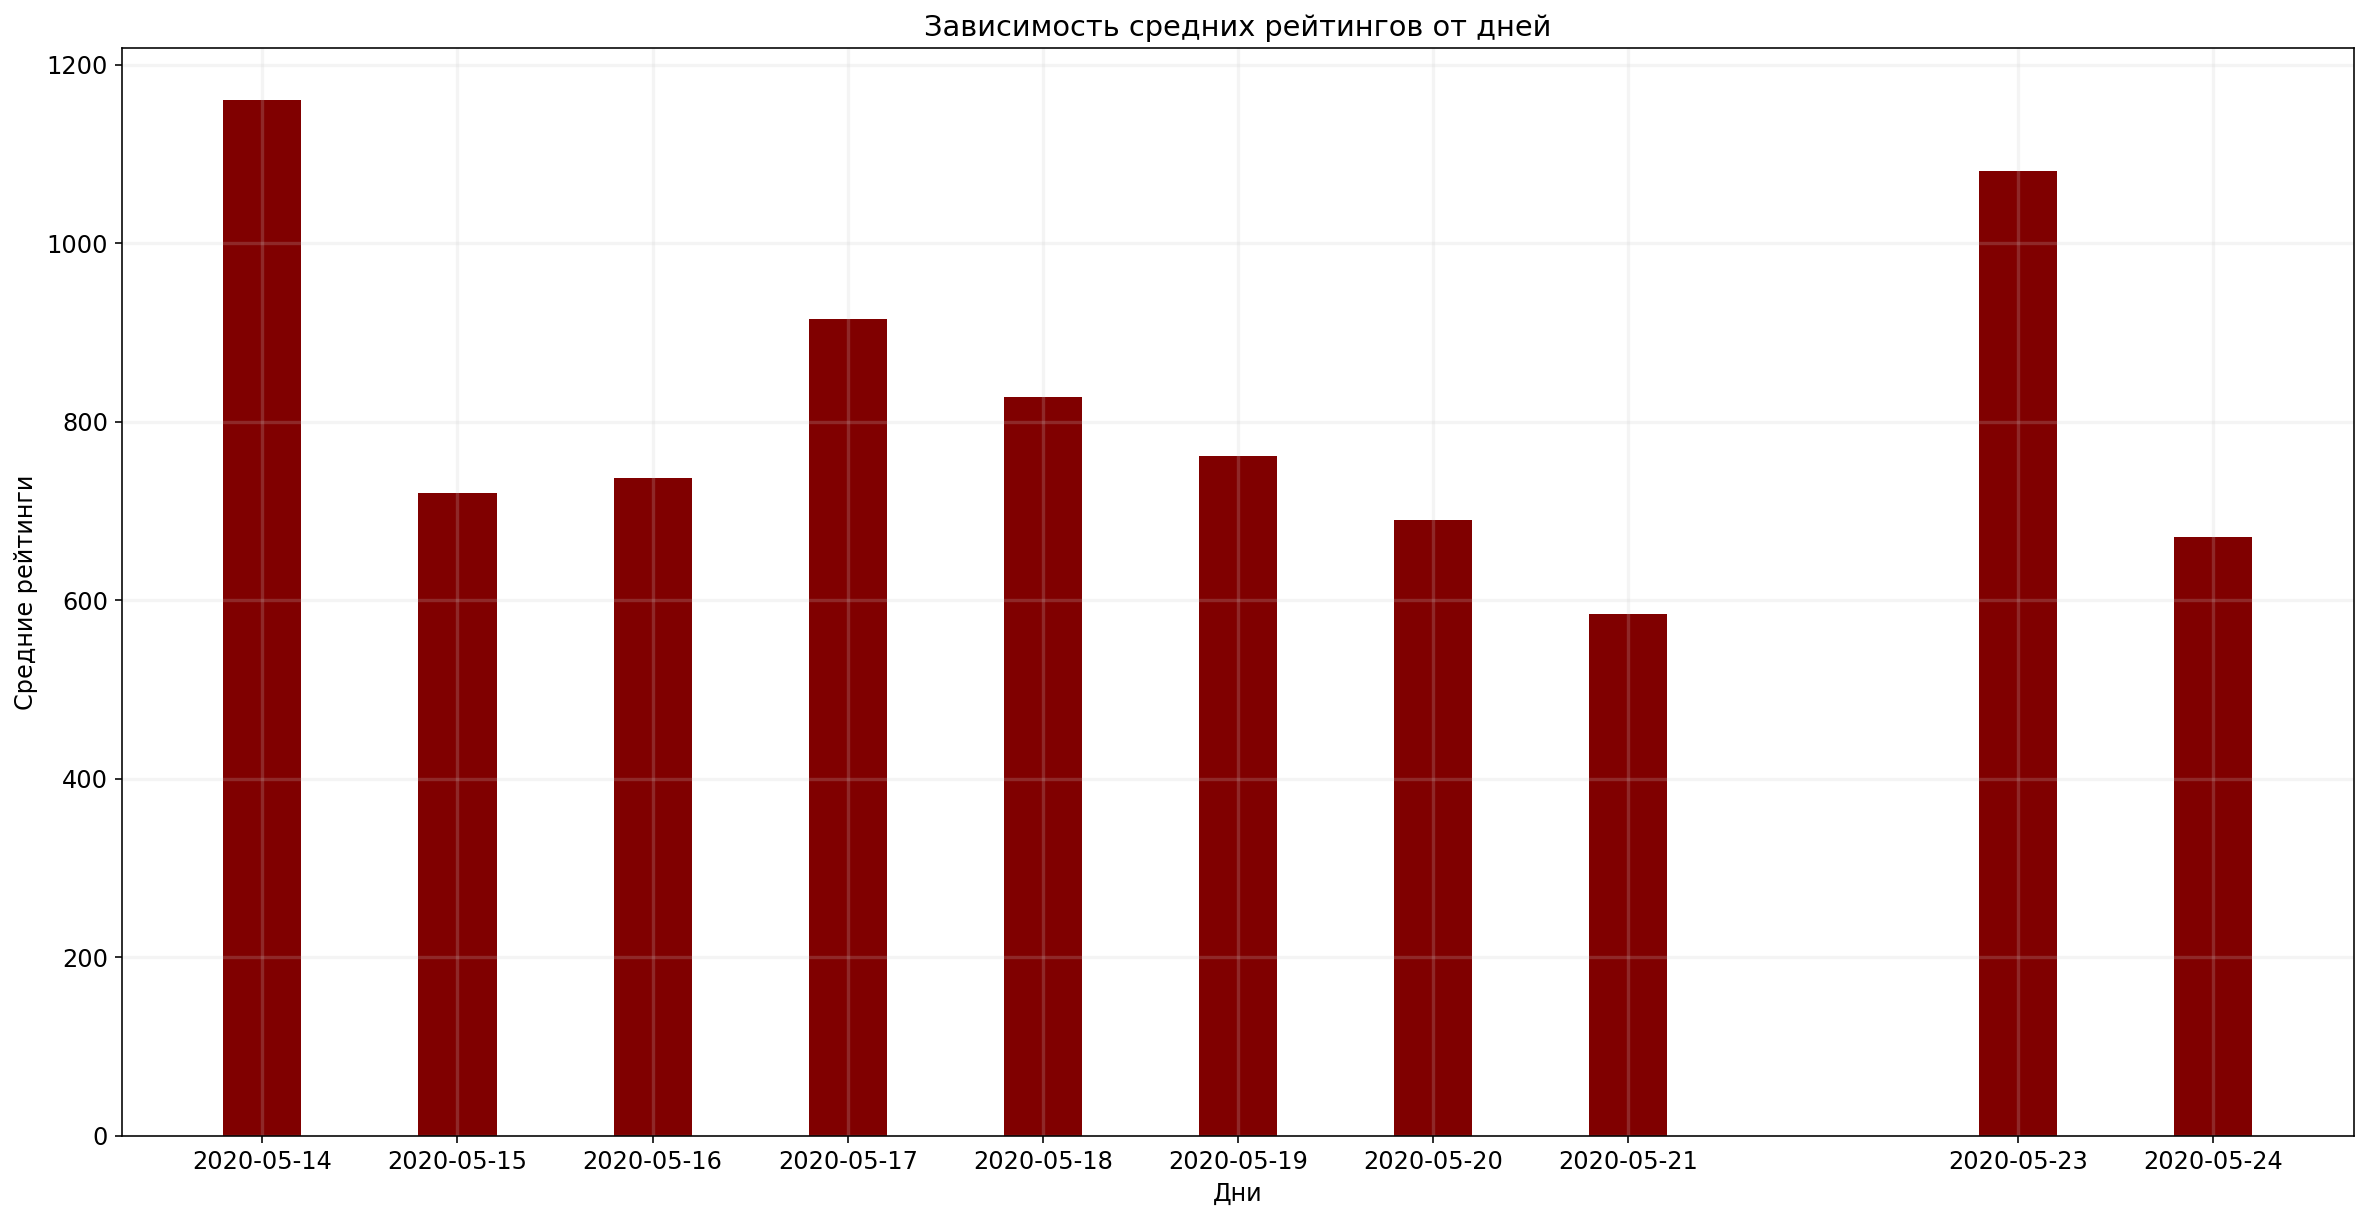

In [1259]:
fig = plt.figure(figsize = (20, 10))
 
plt.rcParams['font.size'] = 12
mpl.rcParams['savefig.format'] = 'pdf'

plt.bar(time, ratings, color = 'maroon',
        width = 0.4)
plt.grid(color='0.8', linewidth=1.7, alpha=0.2)
plt.xticks(time)

plt.xlabel("Дни")
plt.ylabel("Средние рейтинги")
plt.title("Зависимость средних рейтингов от дней")

plt.savefig("ratings_days.pdf")
plt.show()

Сохраните график в формате pdf (так он останется векторизованным).

я сразу сохранила, когда строила!

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

### 2. Распределение студентов по курсам.

Теперь вам нужно распределить студентов по осенним курсам по выбору, учитывая их предпочтения.

Алгоритм распределения студентов по курсам:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом, и места заполняются лучшими по перцентили рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

Обращаем ваше внимание на следующие детали:

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализации МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. <i>Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются. Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо</i>.

- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Постарайтесь воздержаться от использования циклов там, где это возможно. <i>Допустимо итерироваться по <b>курсам</b>, на которые проводится отбор, и по <b>волнам</b> отбора. Если вы придумаете, как обойтись и без этих циклов, то на усмотрение проверяющего могут быть добавлены бонусные баллы. <b>Дублирование кода не признается успешным избавлением от циклов</b></i>

- На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * три столбца: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"
    
    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.
    
    * Формат csv: для сохранения воспользуйтесь df.to_csv('solution.csv', index=None)
    

Для работы вам могут понадобиться следующие данные:

- Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

- Соответствие номеров групп специализациям:

    * 171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
    
    * У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям.

- Ограничения по количеству мест на курсах по выбору:

    * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)

    * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


Кстати, убедитесь, что в данных больше нет пропусков и повторных записей.

#### 0. Проверка

Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [1882]:
assert df.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert df.isna().sum().sum() == 0, 'В таблице остались пропуски'

Если вы не получили AssertionError, то можете продолжать.

#### 1. [1 балл] Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

В этом вам может помочь информация о специализации и группе стундента.

In [1261]:
len(df[((df["17_group"] == 171.0) | (df["17_group"] == 172.0)) & (df["is_ml_student"] == 1.0)])

0

значит, для групп 17-го года столбец is_ml_student и is_mi смысла не имеют. эти столбцы только для 18.

In [1883]:
df["is_ml_ti_student_17"] = ((df["17_group"] == 171.0) | (df["17_group"] == 172.0) | (df["17_group"] == 173.0))

In [1884]:
df["is_ml_student"] = (df["17_group"] == 171.0) | (df["17_group"] == 172.0) | (df["is_ml_student"] == 1.0)

In [1486]:
df["courses_num_fall"] = ((df["is_ml_ti_student_17"] == True) | (df["is_mi"] == True)) + 1

Проверка:

In [1726]:
col_name = "courses_num_fall"

assert(df[df['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(df[df['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(df[df['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(df[df['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

#### 2. [2 балла] Распределите студентов в соответствии с первым приоритетом

In [1727]:
all_courses = list(all_courses)  # а то неудобно

In [1728]:
df = df.sort_values(by=['percentile']).reset_index()
df.index = df.index + 1

# отсортировала по перцентилю, сбросила индексы и сделала, чтобы они были с единицы (я потом на индекс буду умножать)

In [1729]:
df = df.drop(columns=['index'])

In [1730]:
for course in all_courses:
    df[course] = (df.index * ((((df["is_mi"] != 0) | (df["is_ml_ti_student_17"] != 0)) & 
                               (df["fall_2"] == course)) | (df["fall_1"] == course)))
    
# теперь в столбике каждого курса стоит или 0, если студент на этот курс в первую волну не хотел, или номер студента

In [1731]:
# сразу сделаю столбики для задания чуть ниже

df["is_first_place"] = pd.Series(np.ones(df.shape[0]) * np.nan)
df["is_last_place"] = pd.Series(np.ones(df.shape[0]) * np.nan)

In [1732]:
for course in all_courses:
    course_want = df[course][df[course] != 0].values.astype(int)
    course_num = len(course_want)
    
    # если курс а-ля МО-2, который осенью никто не взял, просто пропускаем. мне подходит, что в этом столбике останутся все 0
    if course_num == 0:
        continue
    
    # разбираюсь с числом мест на курс
    if (course == 'Statistical Learning Theory') or (course == 'Высокопроизводительные вычисления'):
        places = min(60, course_num)
    elif course == 'Анализ неструктурированных данных':
        places = course_num
    else:
        places = min(30, course_num)
    
    # определяю номер в df первого и последнего взятого (df отсортирована по перцентилю)
    first_taken = course_want[0]
    last_taken = course_want[places - 1]
    
    # чтобы были не индексы в столбиках, а 1 -- кого взяли, 0 -- кого нет или кто не хотел
    taken = df[course][:last_taken]
    taken[taken != 0] = 1
    
    # теперь в столбике курса будут 0 у тех, кто не пошел или кого не взяли, и номер в df у остальных
    df[course] = np.append(taken, 0 * df[course][last_taken:])
    
    # делаю для следующего задания штуку: фиксирую первого и последнего взятого в нужных столбиках
    df.loc[first_taken, "is_first_place"] = True
    df.loc[last_taken, "is_last_place"] = True
    
# тут я посчитала число желающих на каждый курс, посчитала, сколько человек возьмут, нашла номер последнего попавшего
# и в каждом столбике курса обнулила ячейки ниже его. получилось, что 0 стоят у тех, кто не попал, и у тех, кто и не хотел

Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен 
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

In [1733]:
fir_col_name = "is_first_place"
last_col_name = "is_last_place"


assert((df[df[fir_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
        ==
        check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ).id.values).all()


assert((df[df[last_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       == 
       check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
      ).id.values).all()

In [1734]:
df["course1"] = pd.Series(np.ones(df.shape[0] + 1) * (-1))
df["course2"] = pd.Series(np.ones(df.shape[0] + 1) * (-1))

In [1735]:
for course in all_courses:
    df.loc[(df[course] != 0) & (df["course1"] != -1), "course2"] = course
    df.loc[(df[course] != 0) & (df["course1"] == -1), "course1"] = course

In [1832]:
df.loc[(df["course1"] == df["course2"]) & (df["course1"] != -1), "course2"] = -1

#### 3. [3 балла] Проведите все три волны отбора студентов на курсы по выбору

In [1833]:
df["is_1_wave"] = (df["courses_num_fall"] == df.iloc[:, 18:45].sum(axis=1))

**2 волна**

In [1834]:
# тут будет количество оставшихся мест

course_places = dict()
for course in all_courses:
    reserved = (df[course])[df[course] != 0]
    
    if (course == 'Statistical Learning Theory') or (course == 'Высокопроизводительные вычисления'):
        places = 60
    elif course == 'Анализ неструктурированных данных':
        places = df.shape[0] + 100
    else:
        places = 30
    
    course_places[course] = places - reserved.shape[0]

In [1835]:
# сюда сохраним тех, кто в первую волну управился. для тех, кому нужно выбрать только один курс, вторым курсом поставим -

first = df[df["is_1_wave"] == True]
first.loc[first["courses_num_fall"] == 1, "course2"] = '-'

In [1836]:
# это кто остался на вторую волну

second = df[df["is_1_wave"] == False]

In [1837]:
second = second.sort_values(by=['percentile']).reset_index()
second = second.drop(columns=['index'])

In [1838]:
second.index = second.index + 1

In [1839]:
for course in all_courses:
    second[course] = np.zeros(second.shape[0])
    
# вдруг на какой-то курс никто не захотел вторым или третьим приоритетом. останется старая инфа, тут она будет неверная

In [1840]:
for course in all_courses:
    second[course] = (second.index * ((((second["is_mi"] != 0) | (second["is_ml_ti_student_17"] != 0)) & 
                               (second["fall_3"] == course)) | 
                                      ((second["is_mi"] == 0) & (second["is_ml_ti_student_17"] == 0)) &
                                      (second["fall_2"] == course)))
    
# теперь в столбике каждого курса стоит или 0, если студент на этот курс в первую волну не хотел, или номер студента
# отсортировала по перцентилю, сбросила индексы и сделала, чтобы они были с единицы (я потом на индекс буду умножать)

In [1841]:
for course in all_courses:
    course_want = second[course][second[course] != 0].values.astype(int)
    course_num = len(course_want)
    
    # если курс а-ля МО-2, который осенью никто не взял, просто пропускаем. мне подходит, что в этом столбике останутся все 0
    if course_num == 0:
        continue
    
    places = min(course_num, course_places[course])
    last_taken = course_want[places - 1]
    
    # чтобы были не индексы в столбиках, а 1 -- кого взяли, 0 -- кого нет или кто не хотел
    taken = second[course][:last_taken]
    taken[taken != 0] = 1
    
    # теперь в столбике курса будут 0 у тех, кто не пошел или кого не взяли, и номер в df у остальных
    second[course] = np.append(taken, 0 * second[course][last_taken:])
    
    course_places[course] -= places
# тут я посчитала число желающих на каждый курс, посчитала, сколько человек возьмут, нашла номер последнего попавшего
# и в каждом столбике курса обнулила ячейки ниже его. получилось, что 0 стоят у тех, кто не попал, и у тех, кто и не хотел

In [1842]:
for course in all_courses:
    second.loc[(second[course] != 0) & (second["course1"] != -1), "course2"] = course
    second.loc[(second[course] != 0) & (second["course1"] == -1), "course1"] = course

In [1845]:
second.loc[(second["course1"] == second["course2"]) & (second["course1"] != -1), "course2"] = -1

In [1847]:
second["is_2_wave"] = (pd.Series(np.ones(second.shape[0] + 1)) == 4.0)

In [1848]:
second.loc[((second["courses_num_fall"] == 2) & (second["course1"] != -1) & (second["course2"] != -1)), "is_2_wave"] = True

In [1849]:
second.loc[((second["course1"] != -1) & (second["courses_num_fall"] == 1)), "is_2_wave"] = True

In [1850]:
third = second[second["is_2_wave"] == False]

# список для третьей волны

In [1851]:
# оставим только вторую

second = second[second["is_2_wave"] == True]
second.loc[second["courses_num_fall"] == 1, "course2"] = '-'

**3 волна** (извиняюсь, что не сделала как-нибудь красиво функцией...)

In [1852]:
third = third.sort_values(by=['percentile']).reset_index()
third = third.drop(columns=['index'])

In [1853]:
third.index = third.index + 1

In [1854]:
for course in all_courses:
    third[course] = np.zeros(third.shape[0])
    
# вдруг на какой-то курс никто не захотел вторым или третьим приоритетом. останется старая инфа, тут она будет неверная

In [1855]:
for course in all_courses:
    third[course] = (third.index * (((third["is_mi"] == 0) & (third["is_ml_ti_student_17"] == 0)) &
                                      (third["fall_3"] == course)))
    
# теперь в столбике каждого курса стоит или 0, если студент на этот курс в первую волну не хотел, или номер студента
# отсортировала по перцентилю, сбросила индексы и сделала, чтобы они были с единицы (я потом на индекс буду умножать)

In [1856]:
for course in all_courses:
    course_want = third[course][third[course] != 0].values.astype(int)
    course_num = len(course_want)
    
    # если курс а-ля МО-2, который осенью никто не взял, просто пропускаем. мне подходит, что в этом столбике останутся все 0
    if course_num == 0:
        continue
    
    places = min(course_num, course_places[course])
    last_taken = course_want[places - 1]
    
    # чтобы были не индексы в столбиках, а 1 -- кого взяли, 0 -- кого нет или кто не хотел
    taken = third[course][:last_taken]
    taken[taken != 0] = 1
    
    # теперь в столбике курса будут 0 у тех, кто не пошел или кого не взяли, и номер в df у остальных
    third[course] = np.append(taken, 0 * third[course][last_taken:])
    
# тут я посчитала число желающих на каждый курс, посчитала, сколько человек возьмут, нашла номер последнего попавшего
# и в каждом столбике курса обнулила ячейки ниже его. получилось, что 0 стоят у тех, кто не попал, и у тех, кто и не хотел

In [1857]:
for course in all_courses:
    third.loc[(third[course] != 0) & (third["course1"] != -1), "course2"] = course
    third.loc[(third[course] != 0) & (third["course1"] == -1), "course1"] = course

In [1863]:
third.loc[(third["course1"] == third["course2"]) & (third["course1"] != -1), "course2"] = -1

In [1864]:
third["is_3_wave"] = (pd.Series(np.ones(third.shape[0] + 1)) == 4.0)
third.loc[((third["courses_num_fall"] == 2) & (third["course1"] != -1) & (third["course2"] != -1)), "is_3_wave"] = True
third.loc[((third["course1"] != -1) & (third["courses_num_fall"] == 1)), "is_3_wave"] = True

In [1865]:
loosers = third[third["is_3_wave"] == False]

# кто не смог набрать нужное число курсов

In [1866]:
loosers.loc[loosers["course1"] == -1, "course1"] = '???'
loosers.loc[loosers["course2"] == -1, "course2"] = '???'

In [1867]:
third = third[third["is_3_wave"] == True]
third.loc[third["courses_num_fall"] == 1, "course2"] = '-'

In [1868]:
# теперь надо объединить таблицы

first_courses = first.loc[:, ["id", "course1", "course2"]]
second_courses = second.loc[:, ["id", "course1", "course2"]]
third_courses = third.loc[:, ["id", "course1", "course2"]]
loosers_courses = loosers.loc[:, ["id", "course1", "course2"]]

In [1869]:
result = pd.concat([first_courses,second_courses,third_courses,loosers_courses],axis=0).reset_index()
result = result.drop(columns=['index'])

In [1870]:
result

,id,course1,course2
0,3a7326c9e355a67d3805824ca34c4bc5,Высокопроизводительные вычисления,Statistical Learning Theory
1,3e106aaef8b24dbb01319c73e14c2936,Безопасность компьютерных систем,-
2,e0ca1a9548af9a3f98428c62420aa484,Матричные вычисления,-
3,7fe7df0d207babbf30249b3063ac1f26,Высокопроизводительные вычисления,-
4,86d929f6fd741e56e93cee5900298849,Сбор и обработка данных с помощью краудсорсинга,-
...,...,...,...
342,e0fceae1e285f737630bb6123a1bd85d,Высокопроизводительные вычисления,???
343,7fcf56aae6836855a689000a50e80360,Безопасность компьютерных систем,???
344,d40cbae8cfc9e6c5d05831ef7e122f3e,Анализ неструктурированных данных,???
345,0c0cbdd1a309c1d1fd8993c4dc907bb5,Моделирование временных рядов,???


In [1873]:
result.rename(columns = {'id':'ID'}, inplace = True)

In [1875]:
result.to_csv('res_fall.csv', index=None)

**Отправьте свой файл res_fall.csv в контест (https://contest.yandex.ru/contest/29176/problems/A/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

никнейм: a.dtc
посылка: https://contest.yandex.ru/contest/29176/run-report/53498438/

*Дисклеймер:*

Контест выдаётся для самопроверки. Если ваша посылка получила ОК, то код, скорее всего, правильный. Но при этом оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат.

На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask

**Дополнительное задание. [2 бонусных балла] Распределите таким же образом студентов еще и на весенние курсы по выбору.**

Если ваш код был хорошо структурирован, то это не составит проблем. 

Если вы выполнили это задание, сдайте среди прочего файл res_spring.csv в таком же формате, как и res_fall.csv.

In [1888]:
# я df заново запустила

df["ml_17"] = ((df["17_group"] == 171.0) | (df["17_group"] == 172.0))
df["ml_student"] = ((df["is_ml_student"] == 1) | (df["ml_17"] == True))

In [1889]:
df[(df["ml_student"] == True) & (df["spring_1"] == 'Машинное обучение 2')]

,id,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,blended,timestamp,rating,18_group,is_mi,percentile,17_group,is_ml_student,is_ml_ti_student_17,ml_17,ml_student
27,5daee1bd98559bb2c52373e416942225,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Моделирование временных рядов,Машинное обучение 2,Промышленное программирование на языке Java,Анализ данных в бизнесе,Нет,,2020-05-16 13:02:24.706,593,182.0,0.0,0.681614,0.0,True,False,False,True
179,abceddfa2fc4eae8cff4a4e712abb3fb,Моделирование временных рядов,Принятие решений в условиях риска и неопределё...,Statistical Learning Theory,Машинное обучение 2,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Да,,2020-05-18 23:01:03.214,664,183.0,0.0,0.345291,0.0,True,False,False,True
20,f0f6f3881894172a0f04e79b554b49e6,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Принятие решений в условиях риска и неопределё...,Машинное обучение 2,Численные методы,Дополнительные главы прикладной статистики,Да,,2020-05-15 21:55:16.699,673,181.0,0.0,0.300448,0.0,True,False,False,True


In [1890]:
df.loc[((df["ml_student"] == True) & (df["spring_1"] == 'Машинное обучение 2')), "spring_1"] = df["spring_2"]

In [1891]:
df[(df["ml_student"] == True) & (df["spring_2"] == 'Машинное обучение 2')]

,id,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,blended,timestamp,rating,18_group,is_mi,percentile,17_group,is_ml_student,is_ml_ti_student_17,ml_17,ml_student
119,fc2c60b8004aa91bc272df84628621ff,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Системы баз данных,Машинное обучение 2,Анализ данных в бизнесе,Нет,,2020-05-18 20:34:07.220,639,183.0,0.0,0.461883,0.0,True,False,False,True


In [1892]:
df.loc[((df["ml_student"] == True) & (df["spring_2"] == 'Машинное обучение 2')), "spring_2"] = df["spring_3"]

In [1893]:
df[(df["ml_student"] == True) & (df["spring_3"] == 'Машинное обучение 2')]

,id,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,blended,timestamp,rating,18_group,is_mi,percentile,17_group,is_ml_student,is_ml_ti_student_17,ml_17,ml_student
137,6ed89e424179b0510e3f7c0cb7369ad6,Моделирование временных рядов,Матричные вычисления,Язык SQL,Анализ данных в бизнесе,Промышленное программирование на языке Java,Машинное обучение 2,Да,,2020-05-18 21:24:23.667,558,187.0,0.0,0.838565,0.0,True,False,False,True


In [1894]:
# скопирую просто spring_2, я все равно потом, если проходит в волну на одинаковые курсы, удаляю

df.loc[((df["ml_student"] == True) & (df["spring_3"] == 'Машинное обучение 2')), "spring_3"] = df["spring_2"]

In [1895]:
df["courses_num_spring"] = (df["ml_17"] == True) + 1

извините за красоту дальше...

In [1896]:
df = df.sort_values(by=['percentile']).reset_index()
df.index = df.index + 1
df = df.drop(columns=['index'])
for course in all_courses:
    df[course] = (df.index * (((df["ml_17"] != 0) & (df["spring_2"] == course)) | (df["spring_1"] == course)))
# теперь в столбике каждого курса стоит или 0, если студент на этот курс в первую волну не хотел, или номер студента
for course in all_courses:
    course_want = df[course][df[course] != 0].values.astype(int)
    course_num = len(course_want)
    
    if course_num == 0:
        continue
    
    # разбираюсь с числом мест на курс
    if (course == 'Анализ данных в бизнесе') or (course == 'Обучение с подкреплением'):
        places = min(60, course_num)
    else:
        places = min(30, course_num)
    
    # определяю номер в df первого и последнего взятого (df отсортирована по перцентилю)
    first_taken = course_want[0]
    last_taken = course_want[places - 1]
    
    # чтобы были не индексы в столбиках, а 1 -- кого взяли, 0 -- кого нет или кто не хотел
    taken = df[course][:last_taken]
    taken[taken != 0] = 1
    
    # теперь в столбике курса будут 0 у тех, кто не пошел или кого не взяли, и номер в df у остальных
    df[course] = np.append(taken, 0 * df[course][last_taken:])
    
    # делаю для следующего задания штуку: фиксирую первого и последнего взятого в нужных столбиках
    df.loc[first_taken, "is_first_place"] = True
    df.loc[last_taken, "is_last_place"] = True
    
# тут я посчитала число желающих на каждый курс, посчитала, сколько человек возьмут, нашла номер последнего попавшего
# и в каждом столбике курса обнулила ячейки ниже его. получилось, что 0 стоят у тех, кто не попал, и у тех, кто и не хотел
df["course1"] = pd.Series(np.ones(df.shape[0] + 1) * (-1))
df["course2"] = pd.Series(np.ones(df.shape[0] + 1) * (-1))
for course in all_courses:
    df.loc[(df[course] != 0) & (df["course1"] != -1), "course2"] = course
    df.loc[(df[course] != 0) & (df["course1"] == -1), "course1"] = course
df.loc[(df["course1"] == df["course2"]) & (df["course1"] != -1), "course2"] = -1

In [1901]:
df["is_1_wave"] = (df["courses_num_spring"] == df.iloc[:, 18:45].sum(axis=1))
# тут будет количество оставшихся мест

course_places = dict()
for course in all_courses:
    reserved = (df[course])[df[course] != 0]
    
    if (course == 'Анализ данных в бизнесе') or (course == 'Обучение с подкреплением'):
        places = 60
    else:
        places = 30
    
    course_places[course] = places - reserved.shape[0]
# сюда сохраним тех, кто в первую волну управился. для тех, кому нужно выбрать только один курс, вторым курсом поставим -

first = df[df["is_1_wave"] == True]
first.loc[first["courses_num_spring"] == 1, "course2"] = '-'
# это кто остался на вторую волну

second = df[df["is_1_wave"] == False]
second = second.sort_values(by=['percentile']).reset_index()
second = second.drop(columns=['index'])
second.index = second.index + 1
for course in all_courses:
    second[course] = np.zeros(second.shape[0])
    
# вдруг на какой-то курс никто не захотел вторым или третьим приоритетом. останется старая инфа, тут она будет неверная
for course in all_courses:
    second[course] = (second.index * (((second["ml_17"] != 0) & 
                               (second["spring_3"] == course)) | 
                                      (second["ml_17"] == 0) &
                                      (second["spring_2"] == course)))
    
# теперь в столбике каждого курса стоит или 0, если студент на этот курс в первую волну не хотел, или номер студента
# отсортировала по перцентилю, сбросила индексы и сделала, чтобы они были с единицы (я потом на индекс буду умножать)
for course in all_courses:
    course_want = second[course][second[course] != 0].values.astype(int)
    course_num = len(course_want)
    
    # если курс а-ля МО-2, который осенью никто не взял, просто пропускаем. мне подходит, что в этом столбике останутся все 0
    if course_num == 0:
        continue
    
    places = min(course_num, course_places[course])
    last_taken = course_want[places - 1]
    
    # чтобы были не индексы в столбиках, а 1 -- кого взяли, 0 -- кого нет или кто не хотел
    taken = second[course][:last_taken]
    taken[taken != 0] = 1
    
    # теперь в столбике курса будут 0 у тех, кто не пошел или кого не взяли, и номер в df у остальных
    second[course] = np.append(taken, 0 * second[course][last_taken:])
    
    course_places[course] -= places
# тут я посчитала число желающих на каждый курс, посчитала, сколько человек возьмут, нашла номер последнего попавшего
# и в каждом столбике курса обнулила ячейки ниже его. получилось, что 0 стоят у тех, кто не попал, и у тех, кто и не хотел
for course in all_courses:
    second.loc[(second[course] != 0) & (second["course1"] != -1), "course2"] = course
    second.loc[(second[course] != 0) & (second["course1"] == -1), "course1"] = course
second.loc[(second["course1"] == second["course2"]) & (second["course1"] != -1), "course2"] = -1
second["is_2_wave"] = (pd.Series(np.ones(second.shape[0] + 1)) == 4.0)
second.loc[((second["courses_num_spring"] == 2) & (second["course1"] != -1) & (second["course2"] != -1)), "is_2_wave"] = True
second.loc[((second["course1"] != -1) & (second["courses_num_spring"] == 1)), "is_2_wave"] = True
third = second[second["is_2_wave"] == False]

# список для третьей волны
# оставим только вторую

second = second[second["is_2_wave"] == True]
second.loc[second["courses_num_spring"] == 1, "course2"] = '-'
third = third.sort_values(by=['percentile']).reset_index()
third = third.drop(columns=['index'])
third.index = third.index + 1
for course in all_courses:
    third[course] = np.zeros(third.shape[0])
    
# вдруг на какой-то курс никто не захотел вторым или третьим приоритетом. останется старая инфа, тут она будет неверная
for course in all_courses:
    third[course] = third.index * ((third["ml_17"] == 0) & (third["spring_3"] == course))
    
# теперь в столбике каждого курса стоит или 0, если студент на этот курс в первую волну не хотел, или номер студента
# отсортировала по перцентилю, сбросила индексы и сделала, чтобы они были с единицы (я потом на индекс буду умножать)
for course in all_courses:
    course_want = third[course][third[course] != 0].values.astype(int)
    course_num = len(course_want)
    
    if course_num == 0:
        continue
    
    places = min(course_num, course_places[course])
    last_taken = course_want[places - 1]
    
    # чтобы были не индексы в столбиках, а 1 -- кого взяли, 0 -- кого нет или кто не хотел
    taken = third[course][:last_taken]
    taken[taken != 0] = 1
    
    # теперь в столбике курса будут 0 у тех, кто не пошел или кого не взяли, и номер в df у остальных
    third[course] = np.append(taken, 0 * third[course][last_taken:])
    
# тут я посчитала число желающих на каждый курс, посчитала, сколько человек возьмут, нашла номер последнего попавшего
# и в каждом столбике курса обнулила ячейки ниже его. получилось, что 0 стоят у тех, кто не попал, и у тех, кто и не хотел
for course in all_courses:
    third.loc[(third[course] != 0) & (third["course1"] != -1), "course2"] = course
    third.loc[(third[course] != 0) & (third["course1"] == -1), "course1"] = course
third.loc[(third["course1"] == third["course2"]) & (third["course1"] != -1), "course2"] = -1
third["is_3_wave"] = (pd.Series(np.ones(third.shape[0] + 1)) == 4.0)
third.loc[((third["courses_num_spring"] == 2) & (third["course1"] != -1) & (third["course2"] != -1)), "is_3_wave"] = True
third.loc[((third["course1"] != -1) & (third["courses_num_spring"] == 1)), "is_3_wave"] = True
loosers = third[third["is_3_wave"] == False]

# кто не смог набрать нужное число курсов
loosers.loc[loosers["course1"] == -1, "course1"] = '???'
loosers.loc[loosers["course2"] == -1, "course2"] = '???'
third = third[third["is_3_wave"] == True]
third.loc[third["courses_num_spring"] == 1, "course2"] = '-'
# теперь надо объединить таблицы

first_courses = first.loc[:, ["id", "course1", "course2"]]
second_courses = second.loc[:, ["id", "course1", "course2"]]
third_courses = third.loc[:, ["id", "course1", "course2"]]
loosers_courses = loosers.loc[:, ["id", "course1", "course2"]]
result = pd.concat([first_courses,second_courses,third_courses,loosers_courses],axis=0).reset_index()
result = result.drop(columns=['index'])
result.rename(columns = {'id':'ID'}, inplace = True)
result.to_csv('res_spring.csv', index=None)

**Отправьте свой файл res_spring.csv в контест (https://contest.yandex.ru/contest/29176/problems/B/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

ник: a.dtc

ссылка: https://contest.yandex.ru/contest/29176/run-report/53499549/

На всякий случай просим вас сдать вместе с ноутбуком файл res_spring.csv в anytask

Вставьте картинку, описывающую ваш опыт выполнения этого задания:

воздержусь...